## Exchange Rates

### Introduction

There are two datasets for this project. A dataset of exchange rates was sourced from world bank via www.gapminder.org
FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, CC-BY LICENSE. Another dataset of food prices in Nigeria was sourced from the Nigeria Bureau of Statistics via https://africaopendata.org/dataset/food-prices-for-nigeria.

The dataset covers exchange rates of countries from 1960-2021. Our interest is in the Nigeria US Dollar exchange rates from 2017 - 2021.  The food prices datasets contains prices of food items from 2017 - 2021.

#### Objective
Our objective here is to answer the following questions.

*   How does the exchange rate fair between 2017 and 2019?
*   During the covid pandemic (2020), how does the exchange rate fair?
*   Does this rate in 2017 and 2019 have correlation with food prices?
*   How does this change in (iii) above compare with 2020-2021?
*   What are the food items that are most hit with the exchange rate fluctuations
*   What is the rate of increase in food prices with change in exchange rates
*   What period has the highest increment?
*   Is there a correlation between type of food items and exchange rate changes?

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xchangerates = pd.read_csv('./datasets/exchangerates.csv')

In [70]:
foodprices = pd.read_csv('./datasets/food_prices_ng.csv')

### Data Inspection and Cleaning

Let us inspect the exchange rate dataset and extract that of Nigeria and clean the 

In [3]:
xchangerates.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.79,1.79,1.79,1.79,1.79,1.79,1.79,1.79,1.79,1.79
1,Afghanistan,17.2,17.2,17.2,35.1,38.7,38.7,38.7,38.7,38.7,...,50.9,55.4,57.2,61.1,67.9,68,72.1,77.7,76.8,NaN
2,Angola,0,0,0,0,0,0,0,0,0,...,95.5,96.5,98.3,120,164,166,253,365,578,631
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108,106,105,126,124,119,108,110,109,104
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.778,0.753,0.753,0.901,0.903,0.885,0.847,0.893,0.875,0.845


In [4]:
ngn_exchangerates = xchangerates[xchangerates['country'] == 'Nigeria']
ngn_exchangerates

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
140,Nigeria,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,...,158,157,159,192,253,306,306,307,359,NaN


In [5]:
ngn_exchangerates.isna().sum()

country    0
1960       0
1961       0
1962       0
1963       0
          ..
2017       0
2018       0
2019       0
2020       0
2021       1
Length: 63, dtype: int64

The official exchange rate for 2021 was missing. We checked the official website of Central bank of Nigeria to retrieve this missing data for 2021. We averaged the monthly rates for 2021 and arrived at 477.82.
so, we will impute this value as the missing value.

In [11]:
ngn_exchangerates = ngn_exchangerates.fillna(477.82)

In [12]:
ngn_exchangerates

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
140,Nigeria,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,0.714,...,158,157,159,192,253,306,306,307,359,477.82


In [34]:
ngn_T = ngn_exchangerates.T

In [35]:
ngn_T.columns = ['USD_to_NGN',]

In [58]:
ngn_T['year'] = ngn_T.index

In [59]:
ngn_rates = ngn_T[1:]

In [60]:
ngn_rates.index = range(62)

In [61]:
ngn_rates

,USD_to_NGN,year
0,0.714,1960
1,0.714,1961
2,0.714,1962
3,0.714,1963
4,0.714,1964
...,...,...
57,306,2017
58,306,2018
59,307,2019
60,359,2020


In [62]:
ngn_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   USD_to_NGN  62 non-null     object
 1   year        62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [63]:
ngn_rates['USD_to_NGN'] = ngn_rates['USD_to_NGN'].astype(float)

C:\Users\Dayma\AppData\Local\Temp\ipykernel_23104\1940193812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngn_rates['USD_to_NGN'] = ngn_rates['USD_to_NGN'].astype(float)


In [64]:
ngn_rates['year'] = pd.to_datetime(ngn_rates['year'])

C:\Users\Dayma\AppData\Local\Temp\ipykernel_23104\148577413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngn_rates['year'] = pd.to_datetime(ngn_rates['year'])


In [66]:
ngn_rates['period'] = ngn_rates['year'].dt.year

C:\Users\Dayma\AppData\Local\Temp\ipykernel_23104\26034634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ngn_rates['period'] = ngn_rates['year'].dt.year


In [67]:
ngn_rates

,USD_to_NGN,year,period
0,0.714,1960-01-01,1960
1,0.714,1961-01-01,1961
2,0.714,1962-01-01,1962
3,0.714,1963-01-01,1963
4,0.714,1964-01-01,1964
...,...,...,...
57,306.000,2017-01-01,2017
58,306.000,2018-01-01,2018
59,307.000,2019-01-01,2019
60,359.000,2020-01-01,2020


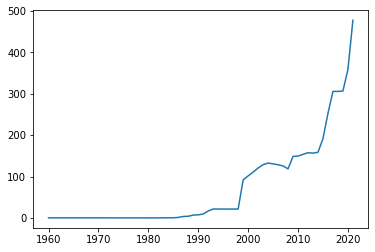

In [68]:
plt.plot(ngn_rates['period'], ngn_rates['USD_to_NGN'])
plt.show()

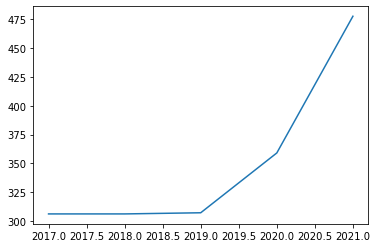

In [69]:
plt.plot(ngn_rates['period'][-5:], ngn_rates['USD_to_NGN'][-5:])
plt.show()

#### Research questions
* i.    How does the exchange rate fair between 2017 and 2019?
* ii.   During the covid pandemic (2020), how does the exchange rate fair?
* iii.  Does this rate in 2017 and 2019 have correlation with food prices?
* iv.   How does this change in (iii) above compare with 2020-2021?
* v.    What are the food items that are most hit with the exchange rate fluctuations
* vi.   What is the rate of increase in food prices with change in exchange rates
* vii.  What period has the highest increment?
* viii. Is there a correlation between type of food items and exchange rate changes?